# **Training autoencoder Pytorch**

# Modello lineare

In [1]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [3]:
transform =  transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

training_data = datasets.MNIST(root = '/dataset', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = '/dataset', train = False, download = True, transform = transform)

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [4]:
for i, data in enumerate(train_dataloader):
    inputs, labels = data
    print(inputs.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [5]:
print(len(train_dataloader))
print(938*64)

938
60032


In [6]:
class Autoencoder_linear(torch.nn.Module):

    def __init__(self):
        super(Autoencoder_linear, self).__init__()

        #Encoder
        self.encoder = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(784, 500),
        torch.nn.ReLU(True),
        torch.nn.Linear(500, 300),
        torch.nn.ReLU(True),
        torch.nn.Linear(300, 100),
        torch.nn.ReLU(True),
        torch.nn.Linear(100, 40)
        )

        #Decoder
        self.decoder = torch.nn.Sequential(
        torch.nn.Linear(40, 300),
        torch.nn.ReLU(True),
        torch.nn.Linear(300, 784),
        torch.nn.Unflatten(1, (1, 28, 28))
        )


    def forward(self, x):

        x = self.encoder(x)
        x = self.decoder(x)

        return x

linear_model = Autoencoder_linear()


In [7]:
def train_model(epoch_num, model, loss_fn, optimizer):
    for epoch in range(epoch_num):
        model.train(True)

        running_loss = 0.
        last_loss = 0.

        for i, data in enumerate(train_dataloader):
            inputs, _ = data
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = loss_fn(outputs, inputs)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                last_loss = running_loss / 100 # Loss per batch
                print('  batch {} loss: {}'.format(i + 1, last_loss))
                running_loss = 0.

        print('Epoch ', epoch+1, ' done')


def test_model(model, loss_fn):
    model.eval()

    total_loss = 0.
    with torch.no_grad():
        for data in test_dataloader:
            test_inputs, _ = data
            test_outputs = model(test_inputs)
            loss = loss_fn(test_outputs, test_inputs)
            total_loss+=loss
    avg_loss = total_loss / len(test_dataloader)

    return avg_loss

In [8]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.001)
epoch_num = 5

train_model(epoch_num=epoch_num, model=linear_model, loss_fn=loss_fn, optimizer=optimizer)

  batch 100 loss: 0.55871253490448
  batch 200 loss: 0.3367036363482475
  batch 300 loss: 0.26842771351337436
  batch 400 loss: 0.23822863519191742
  batch 500 loss: 0.21771908074617385
  batch 600 loss: 0.2009858301281929
  batch 700 loss: 0.18903082981705666
  batch 800 loss: 0.1811386750638485
  batch 900 loss: 0.17200260236859322
Epoch  1  done
  batch 100 loss: 0.16242691680788993
  batch 200 loss: 0.1576570038497448
  batch 300 loss: 0.154969552308321
  batch 400 loss: 0.15016261115670204
  batch 500 loss: 0.14717532232403754
  batch 600 loss: 0.14327678978443145
  batch 700 loss: 0.14091260701417924
  batch 800 loss: 0.13700813740491868
  batch 900 loss: 0.13451876044273375
Epoch  2  done
  batch 100 loss: 0.1300839488953352
  batch 200 loss: 0.12859663128852844
  batch 300 loss: 0.1283985897898674
  batch 400 loss: 0.12561192221939563
  batch 500 loss: 0.12389152504503727
  batch 600 loss: 0.12216517344117164
  batch 700 loss: 0.12084483280777931
  batch 800 loss: 0.11921151809

In [9]:
test_loss = test_model(model=linear_model, loss_fn=loss_fn)
print('Test loss: ', test_loss.item())

Test loss:  0.09620688855648041


In [10]:
train_image_zero, train_target_zero = training_data[0]
print(train_image_zero.shape)


torch.Size([1, 28, 28])


<function matplotlib.pyplot.show(close=None, block=None)>

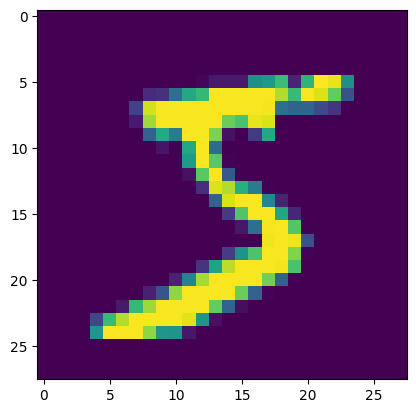

In [11]:
image = torch.reshape(train_image_zero, (28, 28))

plt.figure
plt.imshow(image)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

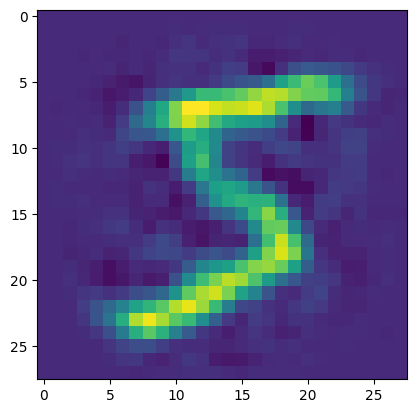

In [12]:
linear_model.eval()


image = torch.reshape(linear_model(train_image_zero), (28, 28))
image = image.detach().numpy()

plt.figure
plt.imshow(image)
plt.show

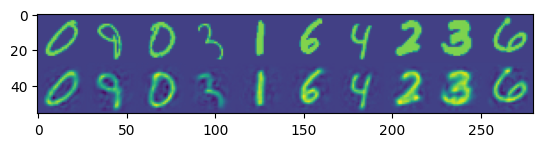

In [13]:
linear_model.eval()
img, labels = list(test_dataloader)[3]

output = linear_model(img)
inp = img[0:10, 0, :, :].squeeze().detach().cpu()
out = output[0:10, 0, :, :].squeeze().detach().cpu()

# Just some trick to concatenate first ten images next to each other
inp = inp.permute(1,0,2).reshape(28, -1).numpy()
out = out.permute(1,0,2).reshape(28, -1).numpy()
combined = np.vstack([inp, out])

plt.imshow(combined)
plt.show()

In [14]:
total_params = sum(
	param.numel() for param in linear_model.parameters() if param.requires_grad
)
print(total_params)

825224


# Modello convoluzionale

In [ ]:
class Autoencoder_conv(torch.nn.Module):

    def __init__(self):
        super(Autoencoder_conv, self).__init__()

        #Encoder
        self.encoder = torch.nn.Sequential(
        torch.nn.Conv2d(1, 4, 3),
        torch.nn.ReLU(True),
        torch.nn.Conv2d(4, 8, 3),
        torch.nn.ReLU(True),
        torch.nn.Dropout2d(p=0.1),
        )

        #Decoder
        self.decoder = torch.nn.Sequential(
        torch.nn.ConvTranspose2d(8, 4, 3),
        torch.nn.ReLU(True),
        torch.nn.Dropout2d(p=0.1),
        torch.nn.ConvTranspose2d(4, 1, 3),
        )


    def forward(self, x):

        x = self.encoder(x)
        x = self.decoder(x)

        return x



conv_model = Autoencoder_conv()


In [16]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(conv_model.parameters(), lr=0.001)
epoch_num = 1

train_model(epoch_num=epoch_num, model=conv_model, loss_fn=loss_fn, optimizer=optimizer)

  batch 100 loss: 0.2622128552943468
  batch 200 loss: 0.115608469247818
  batch 300 loss: 0.09497499048709869
  batch 400 loss: 0.08707403335720301
  batch 500 loss: 0.08438277270644903
  batch 600 loss: 0.07961569078266621
  batch 700 loss: 0.07443541578948498
  batch 800 loss: 0.07274960272014142
  batch 900 loss: 0.06909506272524596
Epoch  1  done


In [17]:
total_params = sum(
	param.numel() for param in conv_model.parameters() if param.requires_grad
)
print(total_params)

665


c:\Users\lucal\anaconda3\envs\baseenv\Lib\site-packages\torch\nn\functional.py:1538: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

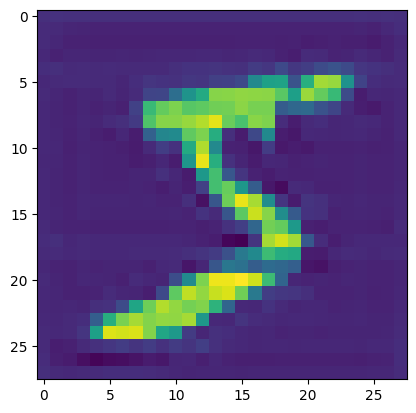

In [18]:
image = torch.reshape(conv_model(train_image_zero), (28, 28))
image = image.detach().numpy()

plt.figure
plt.imshow(image)
plt.show

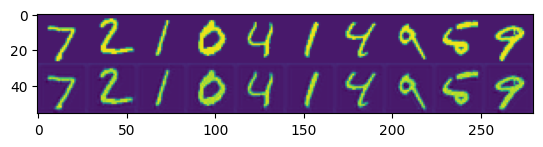

In [19]:
conv_model.eval()
img, labels = list(test_dataloader)[0]

output = conv_model(img)
inp = img[0:10, 0, :, :].squeeze().detach().cpu()
out = output[0:10, 0, :, :].squeeze().detach().cpu()

# Just some trick to concatenate first ten images next to each other
inp = inp.permute(1,0,2).reshape(28, -1).numpy()
out = out.permute(1,0,2).reshape(28, -1).numpy()
combined = np.vstack([inp, out])

plt.imshow(combined)
plt.show()

In [20]:
linear_PATH = './linear_model_weights.pt'
conv_PATH = './conv_model_weights.pt'

torch.save(linear_model.state_dict(), linear_PATH)
torch.save(conv_model.state_dict(), conv_PATH)

In [21]:
loaded_linear = Autoencoder_linear()
loaded_linear.load_state_dict(torch.load(linear_PATH, weights_only=True))
loaded_linear.eval()

loaded_conv = Autoencoder_conv()
loaded_conv.load_state_dict(torch.load(conv_PATH, weights_only=True))
loaded_conv.eval()

Autoencoder_conv(
  (encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Dropout2d(p=0.1, inplace=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Dropout2d(p=0.1, inplace=False)
    (3): ConvTranspose2d(4, 1, kernel_size=(3, 3), stride=(1, 1))
  )
)

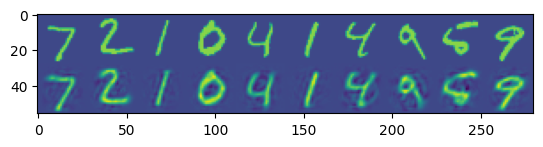

In [22]:
loaded_linear.eval()
img, labels = list(test_dataloader)[0]

output = loaded_linear(img)
inp = img[0:10, 0, :, :].squeeze().detach().cpu()
out = output[0:10, 0, :, :].squeeze().detach().cpu()

# Just some trick to concatenate first ten images next to each other
inp = inp.permute(1,0,2).reshape(28, -1).numpy()
out = out.permute(1,0,2).reshape(28, -1).numpy()
combined = np.vstack([inp, out])

plt.imshow(combined)
plt.show()

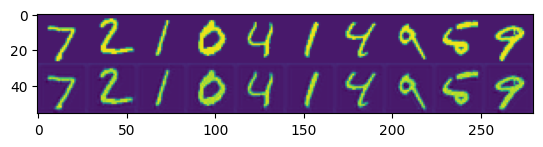

In [23]:
loaded_conv.eval()
img, labels = list(test_dataloader)[0]

output = loaded_conv(img)
inp = img[0:10, 0, :, :].squeeze().detach().cpu()
out = output[0:10, 0, :, :].squeeze().detach().cpu()

# Just some trick to concatenate first ten images next to each other
inp = inp.permute(1,0,2).reshape(28, -1).numpy()
out = out.permute(1,0,2).reshape(28, -1).numpy()
combined = np.vstack([inp, out])

plt.imshow(combined)
plt.show()

In [2]:
conv_PATH = './conv_model_weights.pt'
print(torch.load(conv_PATH).keys())

odict_keys(['encoder.0.weight', 'encoder.0.bias', 'encoder.2.weight', 'encoder.2.bias', 'decoder.0.weight', 'decoder.0.bias', 'decoder.3.weight', 'decoder.3.bias'])


In [25]:
print(linear_PATH)

./linear_model_weights.pt
